In [1]:
# Download examples
!mkdir examples
!cd examples && wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/image_generation/examples/kitty.png

--2025-01-01 02:58:18--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/image_generation/examples/kitty.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 387333 (378K) [image/png]
Saving to: ‘kitty.png’

kitty.png           100%[===================>] 378.25K  --.-KB/s    in 0.008s  

2025-01-01 02:58:19 (46.7 MB/s) - ‘kitty.png’ saved [387333/387333]



패키지 불러오기

In [2]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import make_image_grid
from PIL import Image

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


사전 학습 모델 불러오기

In [3]:
pipeline = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [01:20<00:00, 11.52s/it]


예제 이미지 불러와서 모델 추론하기

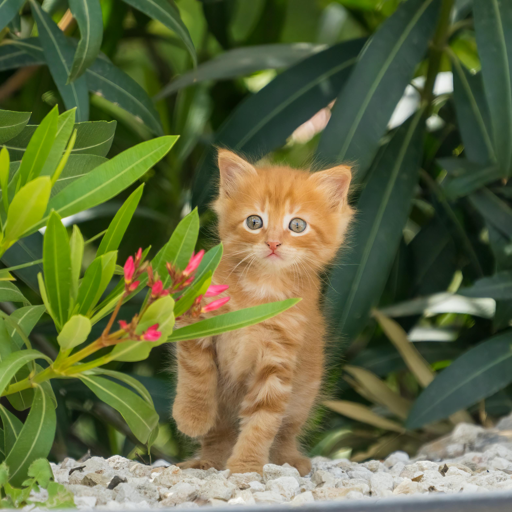

In [4]:
input_image = Image.open("examples/kitty.png")
make_image_grid([input_image], rows=1, cols=1)

In [8]:
prompt = "kitty in the city, cartoon style, angry, drawing, detailed"
negative_prompt = "ugly, blurry, bad anatomy, bad art, wierd colors"

In [9]:
output_images = pipeline(
    image=input_image,
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=4,
    num_inference_steps=30,
    strength=0.7,
).images

100%|██████████| 21/21 [00:01<00:00, 13.51it/s]


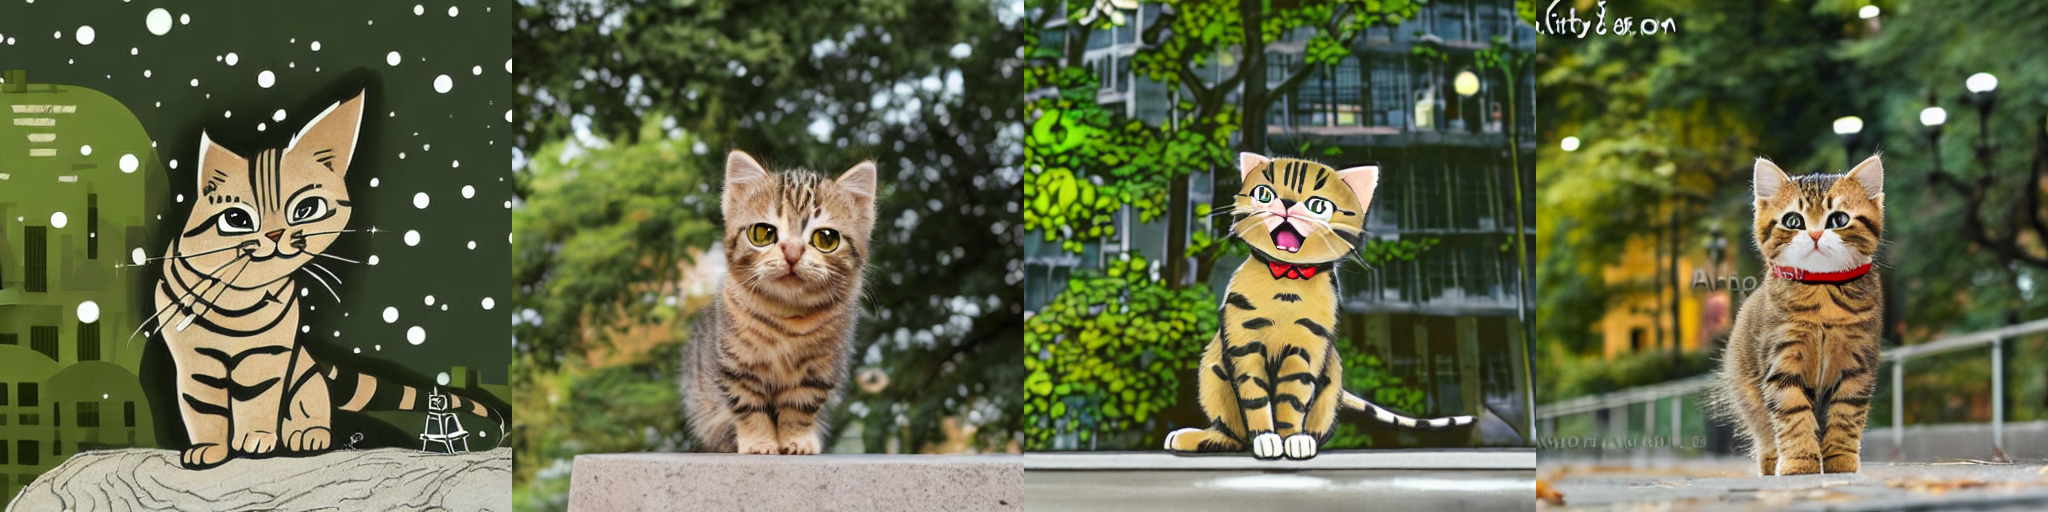

In [10]:
make_image_grid(output_images, rows=1, cols=4)